In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score
import csv
import google.generativeai as genai
import clip
import json
import seaborn as sns
import pandas as pd
import os

In [8]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [5]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
label_mapping = {'Non-offensiv': 0, 'offensive': 1}

with open('MultiOFF/Training_meme_dataset.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    MultiOFF_ground_truth = [label_mapping[row['label']] for row in reader]

# Plots

In [42]:
data = {
    'Model': ['CLIP', 'CLIP', 'CLIP', 'Gemini', 'Gemini', 'Gemini'],
    'Dataset': ['Hateful Memes', 'MultiOFF', 'MOMENTA', 'Hateful Memes', 'MultiOFF', 'MOMENTA'],
    'Accuracy': [0.6115, 0.6083, 0.5386, 0.6544, 0.6030, 0.6058]
}
df = pd.DataFrame(data)
# Define a custom sort order for the models
model_order = ['Gemini', 'CLIP']
df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)

In [52]:
# set the palette for the plots
# Define the custom color palette using the HEX codes from the image
#hex_codes = ['#FFF3EA', '#FFDEC5', '#FFD2B1', '#FC3C0F', '#890E0E']

# Set the custom color palette
#sns.set_palette(sns.color_palette(hex_codes))
# Use a predefined style that is typically light
plt.rcParams.update({
    'figure.facecolor': 'white',    # Figure background
    'axes.facecolor': 'white',      # Axes background
    'savefig.facecolor': 'white',   # Saved figure background
    'axes.edgecolor': '#890E0E',    # Axes edge color for visibility
    'axes.labelcolor': '#890E0E',   # Axes label color for visibility
    'xtick.color': '#890E0E',       # X-tick color for visibility
    'ytick.color': '#890E0E',       # Y-tick color for visibility
    'grid.color': '#890E0E',        # Grid line color (if grid is used)
    'text.color': '#890E0E'         # Default text color
})

# Define custom colors for each dataset
dataset_colors = {
    'Hateful Memes': '#FFD2B1',  # Orange for Hateful Memes
    'MultiOFF': '#FC3C0F',       # Dark red for MultiOFF
    'MOMENTA': '#FC3C0F'         # Dark red for MOMENTA
}

C:\Users\User\AppData\Local\Temp\ipykernel_13708\2645907482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


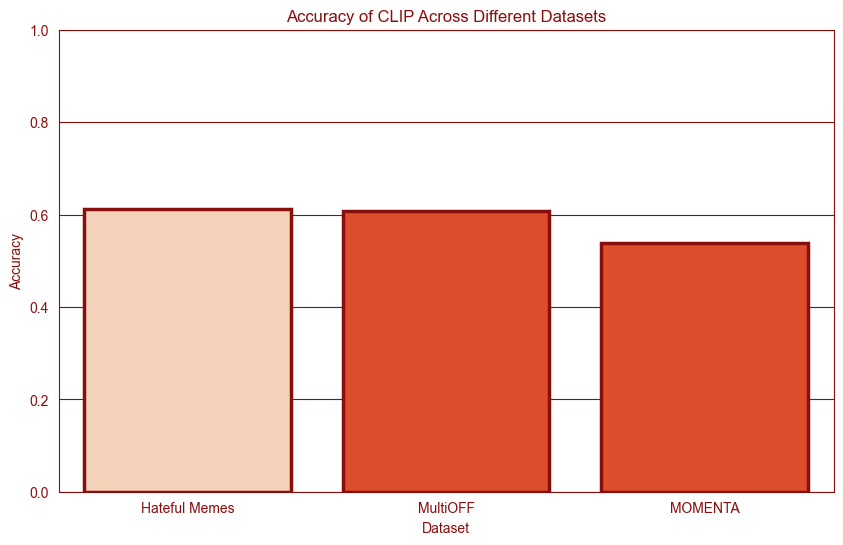

In [62]:
# Filtering the data for CLIP model
clip_data = df[df['Model'] == 'CLIP']

# Create a list of colors for the bars matching the dataset order for CLIP
colors = [dataset_colors[dataset] for dataset in clip_data['Dataset']]


plt.figure(figsize=(10, 6))

# Plot for CLIP
ax = sns.barplot(
    data=clip_data,
    x='Dataset', 
    y='Accuracy', 
    palette=colors,  # Apply the custom colors
    edgecolor='#890E0E',  # Set the color of the bar edges
    linewidth=2.5  # Set the thickness of the bar edges
)
ax.set_title('Accuracy of CLIP Across Different Datasets')
ax.set_ylim(0.0, 1.0)  # Adjust based on your accuracy range
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13708\1754887916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_13708\1754887916.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


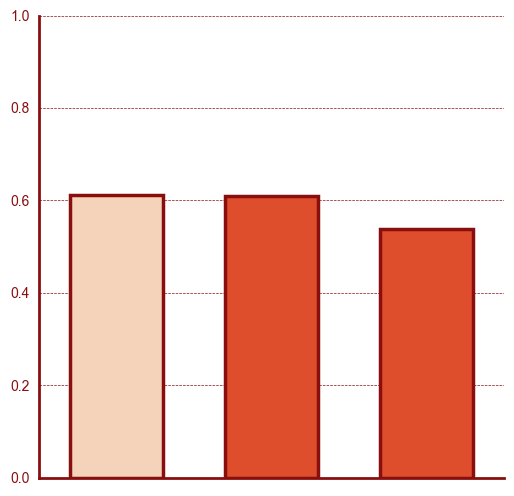

In [91]:
# Filtering the data for CLIP model
clip_data = df[df['Model'] == 'CLIP']

# Create a list of colors for the bars matching the dataset order for CLIP
colors = [dataset_colors[dataset] for dataset in clip_data['Dataset']]


plt.figure(figsize=(6, 6))

# Plot for CLIP
ax = sns.barplot(
    data=clip_data,
    x='Dataset', 
    y='Accuracy', 
    palette=colors,  # Apply the custom colors
    edgecolor='#890E0E',  # Set the color of the bar edges
    linewidth=2.5,  # Set the thickness of the bar edges
    width=0.6
)

# Remove all labels and title
ax.set_title('')  # Remove the title
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels
#ax.set_yticklabels([])  # Remove y-axis tick labels
#ax.yaxis.grid(False)  # Disable y-axis grid lines

# Remove top and right spines
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Thicken the axes lines
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the thickness of the axes lines
    
# Set horizontal grid lines to be dotted
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

# Optionally, remove the legend if it exists
ax.legend().remove()
#ax.set_title('Accuracy of CLIP Across Different Datasets')
ax.set_ylim(0.0, 1.0)  # Adjust based on your accuracy range

# Save the figure as an SVG file
plt.savefig('plots/CLIP.svg', format='svg', transparent=True)


plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13708\3676550056.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


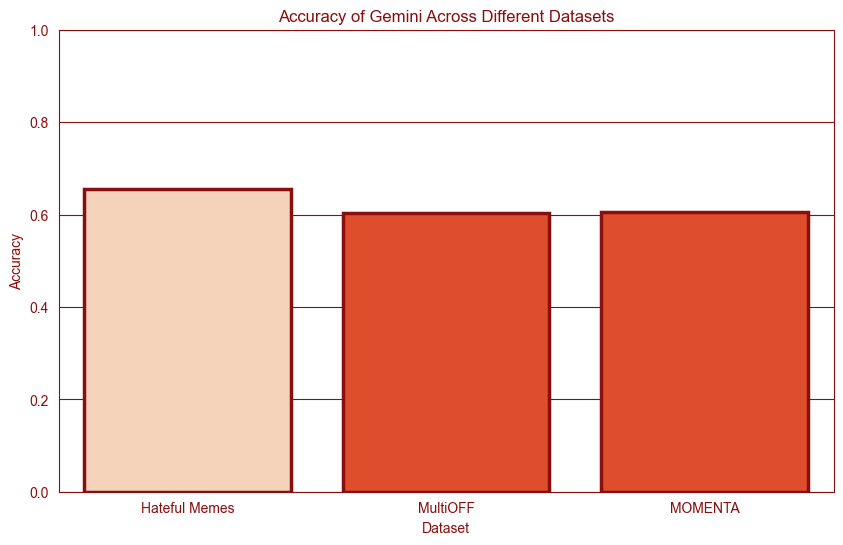

In [95]:
# Filtering the data for CLIP model
clip_data = df[df['Model'] == 'Gemini']

# Create a list of colors for the bars matching the dataset order for CLIP
colors = [dataset_colors[dataset] for dataset in clip_data['Dataset']]


plt.figure(figsize=(10, 6))

# Plot for CLIP
ax = sns.barplot(
    data=clip_data,
    x='Dataset', 
    y='Accuracy', 
    palette=colors,  # Apply the custom colors
    edgecolor='#890E0E',  # Set the color of the bar edges
    linewidth=2.5  # Set the thickness of the bar edges
)
ax.set_title('Accuracy of Gemini Across Different Datasets')
ax.set_ylim(0.0, 1.0)  # Adjust based on your accuracy range
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_13708\729617125.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_13708\729617125.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


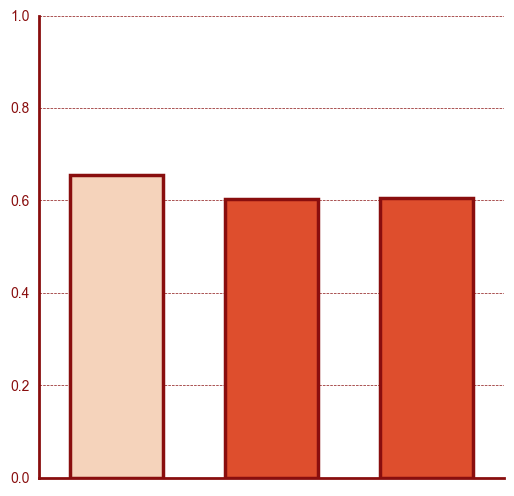

In [96]:
# Filtering the data for CLIP model
clip_data = df[df['Model'] == 'Gemini']

# Create a list of colors for the bars matching the dataset order for CLIP
colors = [dataset_colors[dataset] for dataset in clip_data['Dataset']]


plt.figure(figsize=(6, 6))

# Plot for CLIP
ax = sns.barplot(
    data=clip_data,
    x='Dataset', 
    y='Accuracy', 
    palette=colors,  # Apply the custom colors
    edgecolor='#890E0E',  # Set the color of the bar edges
    linewidth=2.5,  # Set the thickness of the bar edges
    width=0.6
)

# Remove all labels and title
ax.set_title('')  # Remove the title
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')  # Remove y-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels
#ax.set_yticklabels([])  # Remove y-axis tick labels
#ax.yaxis.grid(False)  # Disable y-axis grid lines

# Remove top and right spines
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine

# Thicken the axes lines
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Set the thickness of the axes lines
    
# Set horizontal grid lines to be dotted
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

# Optionally, remove the legend if it exists
ax.legend().remove()
#ax.set_title('Accuracy of CLIP Across Different Datasets')
ax.set_ylim(0.0, 1.0)  # Adjust based on your accuracy range

# Save the figure as an SVG file
plt.savefig('plots/Gemini.svg', format='svg', transparent=True)


plt.show()

In [97]:
## Task 2 - accuracy per target 
'''
D:\Thesis\Thesis\.venv\Scripts\python.exe D:\Thesis\Thesis2\subclass.py 
Accuracy for class organization: 0.4117647058823529
Accuracy for class unclassified: 0.7754285714285715
Accuracy for class individual: 0.28629856850715746
Accuracy for class community: 0.646551724137931
Accuracy for class society: 0.3170731707317073

Process finished with exit code 0
'''

'\nD:\\Thesis\\Thesis\\.venv\\Scripts\\python.exe D:\\Thesis\\Thesis2\\subclass.py \nAccuracy for class organization: 0.4117647058823529\nAccuracy for class unclassified: 0.7754285714285715\nAccuracy for class individual: 0.28629856850715746\nAccuracy for class community: 0.646551724137931\nAccuracy for class society: 0.3170731707317073\n\nProcess finished with exit code 0\n'

In [38]:
# Define colors for each model
model_colors = {
    'CLIP': '#FFD2B1',   # Light orange for CLIP
    'Gemini': '#FC3C0F'  # Red for Gemini
}

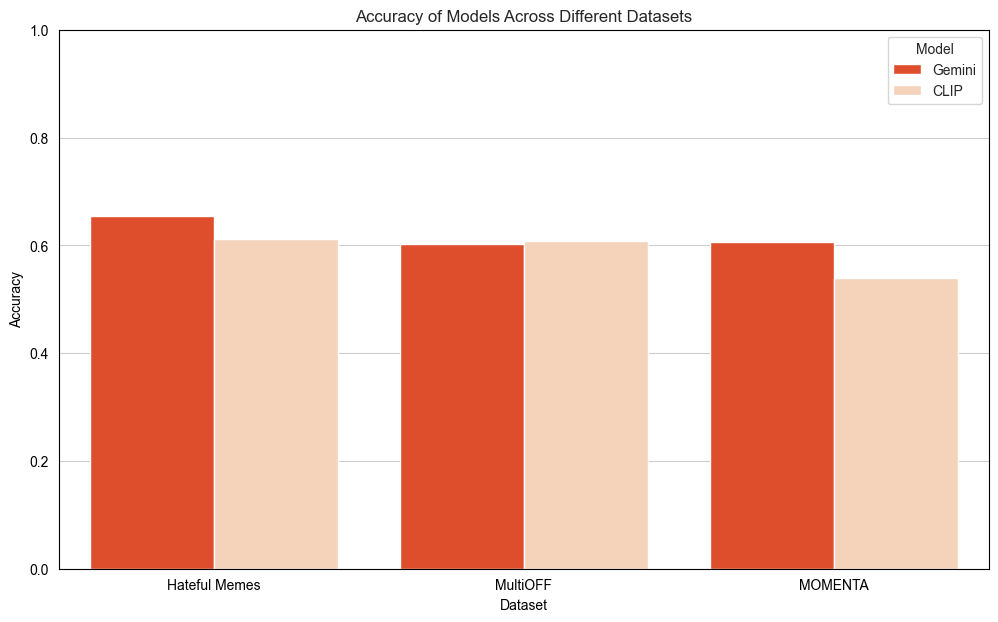

In [45]:
plt.figure(figsize=(12, 7))

# Create the plot
ax = sns.barplot(
    data=df,
    x='Dataset', 
    y='Accuracy', 
    hue='Model',  # Differentiate bars by model
    palette=model_colors  # Apply the custom colors per model
)

# Customizations
ax.set_title('Accuracy of Models Across Different Datasets')
ax.set_ylim(0.0, 1.0)  # Adjust based on your accuracy range
plt.legend(title='Model')

## Clip Results

### MultiOFF

# Gemini Pro Results

## Long Prompt - with definition

### Hateful Memes

AOC-ROC score: 0.75
FPR:  [0.         0.41380665 1.        ] TPR:  [0.         0.92010652 1.        ]
Accuracy: 71.01%


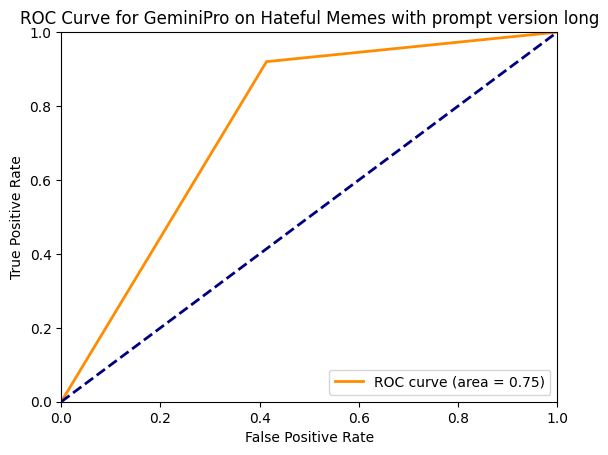

<Figure size 640x480 with 0 Axes>

In [6]:
# Initialize lists for ground truth labels and predicted labels
ground_truth = []
predicted = []

# Open the results file
with open('GeminiProResultsClen.jsonl', 'r') as f:
    for line in f:
        result = json.loads(line)
        # Only consider results for the Hateful Memes dataset and the "long" prompt version
        if result["dataset"] == "HatefulMemes" and result["prompt_version"] == "long":
            ground_truth.append(result["ground_label"])
            predicted.append(result["predicted_label"])

# Calculate FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(ground_truth, predicted)
roc_auc = roc_auc_score(ground_truth, predicted)

# Print the results
#print("True labels: ", ground_truth)
#print("Predicted labels: ", predicted)
print("AOC-ROC score: {:.2f}".format(roc_auc))
print("FPR: ", fpr, "TPR: ", tpr)
accuracy = accuracy_score(ground_truth, predicted)
print(f'Accuracy: {accuracy*100:.2f}%')


# Create the plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GeminiPro on Hateful Memes with prompt version long')
plt.legend(loc="lower right")
plt.show()

# Save the plot to a file
plt.savefig('roc_curve_GeminiPro_HatefulMemes_long.png')

### MultiOFF

In [ ]:
# Initialize lists for ground truth labels and predicted labels
ground_truth = []
predicted = []
